<a href="https://colab.research.google.com/github/GVSU-CIS635/gvsu-cis635-term-project-team-i-k-i-m/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#Loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Loading the excel files from 2013-2016
#data_12 = pd.read_csv('/content/drive/MyDrive/030112_123112_Data/NIJ2012_MAR01_DEC31.xlsx')
data_13 = pd.read_excel('/content/drive/MyDrive/010113_123113_Data/NIJ2013_JAN01_DEC31.xlsx')
data_14 = pd.read_excel('/content/drive/MyDrive/010114_123114_Data/NIJ2014_JAN01_DEC31.xlsx')
data_15 = pd.read_excel('/content/drive/MyDrive/010115_123115_Data/NIJ2015_JAN01_DEC31.xlsx')
data_16 = pd.read_excel('/content/drive/MyDrive/010116_073116_Data/NIJ2016_JAN01_JUL31.xlsx')

In [11]:
#checking the dimensions of the dataframes
print(data_13.shape)
print(data_14.shape)
print(data_15.shape)
print(data_16.shape)

(174046, 8)
(188924, 8)
(208083, 8)
(120466, 8)


In [15]:
#Checking the features in each dataset
column_names13 = data_13.columns
column_names14 = data_14.columns
column_names15 = data_15.columns
# Print the column names
print(column_names13)
print(column_names14)
print(column_names15)

Index(['CATEGORY', 'CALL GROUPS', 'final_case_type', 'CASE DESC', 'occ_date',
       'x_coordinate', 'y_coordinate', 'census_tract'],
      dtype='object')
Index(['CATEGORY', 'CALL GROUPS', 'final_case_type', 'CASE DESC', 'occ_date',
       'x_coordinate', 'y_coordinate', 'census_tract'],
      dtype='object')
Index(['CATEGORY', 'CALL GROUPS', 'final_case_type', 'CASE DESC', 'occ_date',
       'x_coordinate', 'y_coordinate', 'census_tract'],
      dtype='object')


In [22]:
#We need to merge the data from 2013 and 2014 together whivh will be used to train our model
train_data = pd.concat([data_13,data_14])
print(f"The training data has {train_data.shape[0]} rows and {train_data.shape[1]} attributes.")
train_data.head(5)


The training data has 362970 rows and 8 attributes.


,CATEGORY,CALL GROUPS,final_case_type,CASE DESC,occ_date,x_coordinate,y_coordinate,census_tract
0,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2013-01-01,7625659,714714,4101.0
1,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2013-01-01,7628093,655826,6404.0
2,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2013-01-01,7631900,704307,4002.0
3,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2013-01-01,7643655,682985,10600.0
4,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2013-01-01,7643778,681457,10600.0


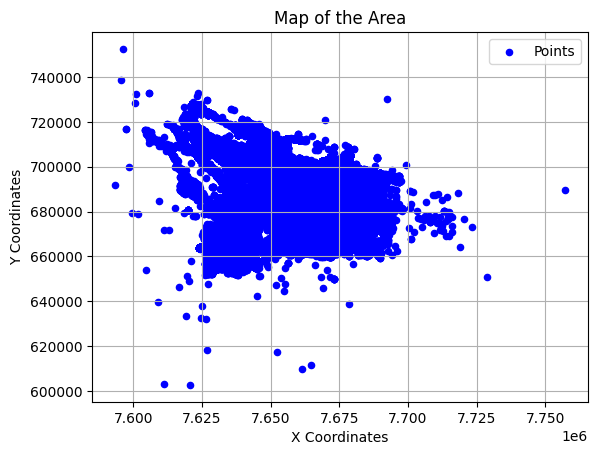

In [32]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt



# Plotting the map
train_data.plot(kind='scatter', x='x_coordinate', y='y_coordinate', marker='o', color='blue', label='Points')
plt.title('Map of the Area')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.legend()
plt.grid(True)
plt.show()



In [29]:
# Plot of the portland area under study
import geopandas as gpd
#importing the shapefiles
sf_13 = ('/content/drive/MyDrive/010113_123113_Data/NIJ2013_JAN01_DEC31.shp')
gdp_13 = gpd.read_file(sf_13)


In [30]:
gdp_13.head

<bound method NDFrame.head of              CATEGORY      CALL_GROUP final_case               CASE_DESC  \
0       STREET CRIMES        DISORDER      DISTP  DISTURBANCE - PRIORITY   
1       STREET CRIMES        DISORDER      DISTP  DISTURBANCE - PRIORITY   
2       STREET CRIMES        DISORDER      DISTP  DISTURBANCE - PRIORITY   
3       STREET CRIMES        DISORDER      DISTP  DISTURBANCE - PRIORITY   
4       STREET CRIMES        DISORDER      DISTP  DISTURBANCE - PRIORITY   
...               ...             ...        ...                     ...   
174041       BURGLARY  PROPERTY CRIME      BURGP  BURGLARY - PRIORITY *H   
174042       BURGLARY  PROPERTY CRIME      BURGP  BURGLARY - PRIORITY *H   
174043       BURGLARY  PROPERTY CRIME      BURGP  BURGLARY - PRIORITY *H   
174044       BURGLARY  PROPERTY CRIME      BURGP  BURGLARY - PRIORITY *H   
174045       BURGLARY  PROPERTY CRIME      BURGP  BURGLARY - PRIORITY *H   

          occ_date  x_coordina  y_coordina  census_tra  \

<Axes: >

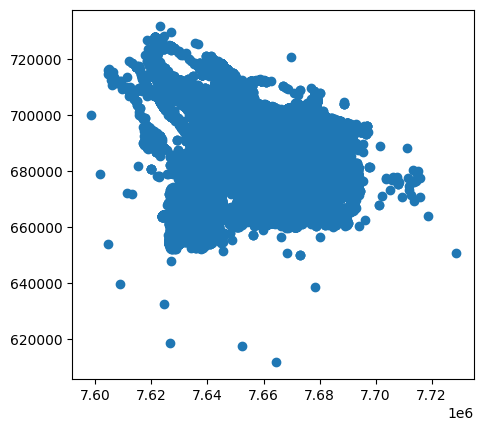

In [31]:
gdp_13.plot()